In [31]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

We will create a function that we will use to generate the different datasets mentioned in the problem.

1. We want the datasets to be really well separated. We will define the centers of the two classes to be really far apart and a moderate standard deviation using make_blobs.

2. In this example, we want Quadratic Discriminant Analysis to perform very well while Logistic to perform poorly. We will use make_moons since it creates the dataset in swirl pattern which is very similar to a quadratic equation graph. We will also square one of the inputs to introduce strong quadratic features.

3. Here, we want decision tree and KNN to overfit. Hence, we will use make_moons and make_circles with high noise to generate data for the 2 classes which should introduce complex patterns that can lead to overfitting of decision tree and KNN. We will also adjust the "factor" parameter of make_circles to be high to introduce more overlap hence more complexity.

4. Here, we want SVM and KNN to perform better than the others that means the classes should have clear separation which is not quadratic/linear. We will use make_circles (for non-quadratic and linear features) and set the factor to be low to have clear separation between the points.

In [32]:
def generate_synthetic_data(example):
    if example == 1:
        # Example 1
        X, y = make_blobs(n_samples=100, centers=[(-5, -5), (5, 5)], cluster_std=1.0, random_state=42)
    elif example == 2:
        # Example 2
        X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
        X[:, 0] = X[:, 0] ** 2
    elif example == 3:
        # Example 3
        X_moons, y_moons = make_moons(n_samples=50, noise=0.4, random_state=42)
        X_circles, y_circles = make_circles(n_samples=50, noise=0.4, factor=0.99, random_state=42)
        X = np.concatenate([X_moons, X_circles])
        y = np.concatenate([y_moons, y_circles])
    elif example == 4:
        # Example 4
        X, y = make_circles(n_samples=100, noise=0.1, factor=0.1, random_state=42)


    return X, y

We will create a function that we will use to visualize the boundaries created by each classifier.


In [33]:
def plot_decision_boundary(model, X, y):
    h = .02  # small step size in the mesh for a smoother decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

We will create a loop for all the 4 examples.
Steps at each iteration:

*   Generate the synthetic data.
*   Split data into train and test sets.
*   Define our classifiers.
*   Fit the models of the above classifiers.
*   Print the train and test accuracies.
*   Print the classification report.
*   Visualize the decision boundary.









Example 1, Classifier: Naive Bayes
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



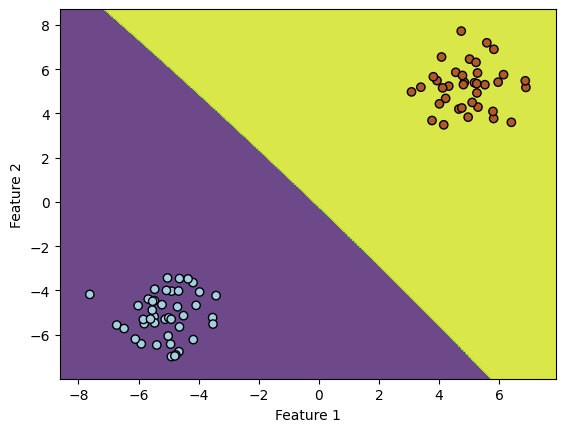

Example 1, Classifier: Logistic Regression
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



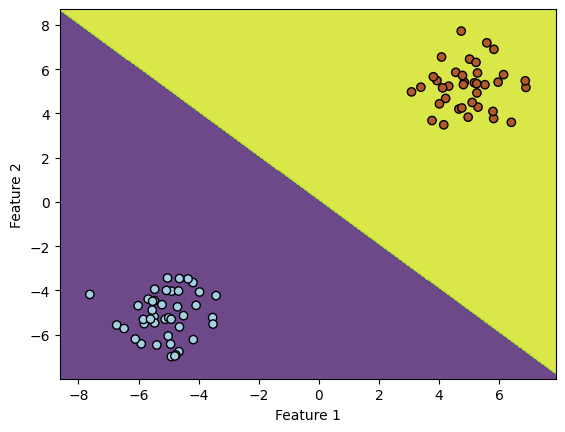

Example 1, Classifier: Quadratic Discriminant Analysis
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



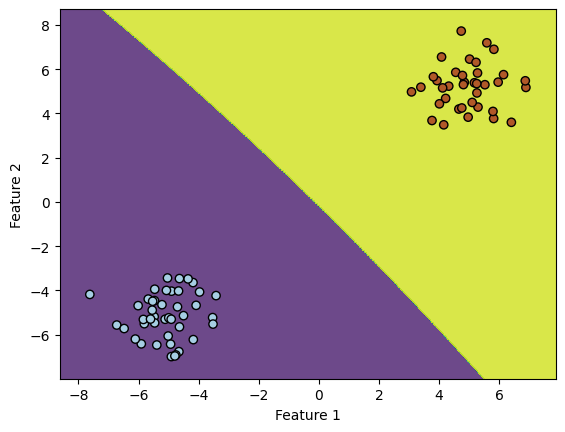

Example 1, Classifier: SVM with RBF Kernel
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



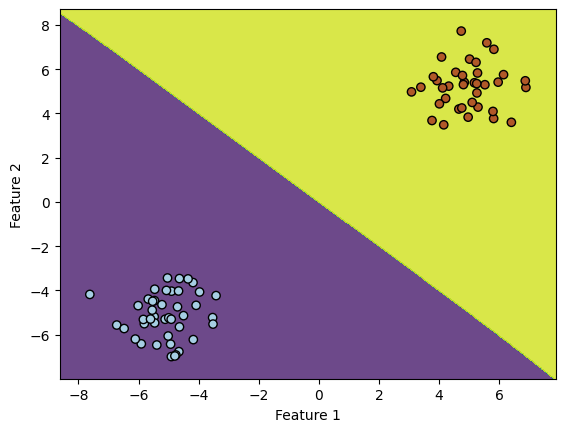

Example 1, Classifier: Decision Tree
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



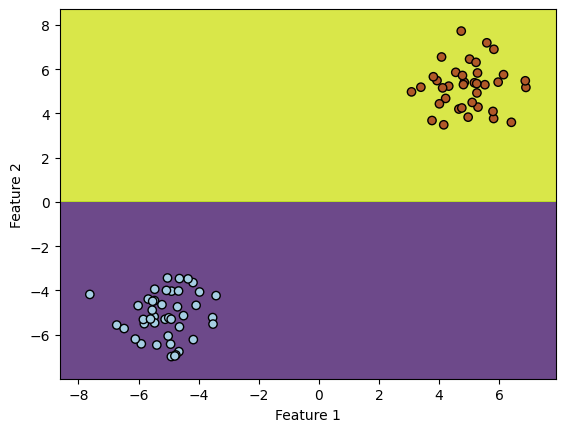

Example 1, Classifier: KNN with K=1
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



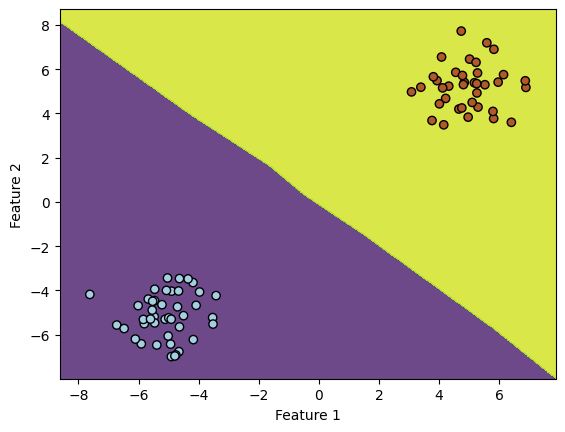

Example 2, Classifier: Naive Bayes
Training Accuracy: 0.8625
Testing Accuracy: 0.9
Training Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        36
           1       0.88      0.86      0.87        44

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.75      1.00      0.86         6

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20



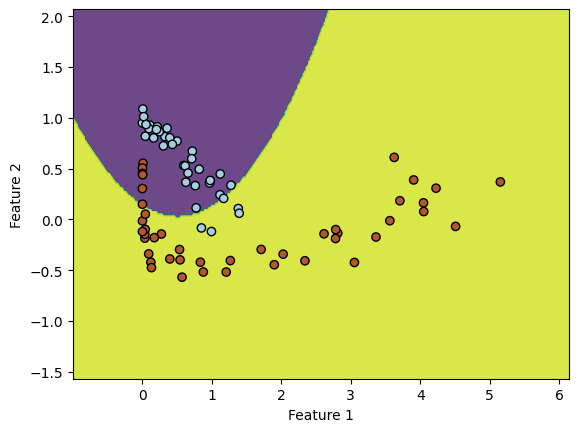

Example 2, Classifier: Logistic Regression
Training Accuracy: 0.8375
Testing Accuracy: 0.85
Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        36
           1       0.84      0.86      0.85        44

    accuracy                           0.84        80
   macro avg       0.84      0.83      0.84        80
weighted avg       0.84      0.84      0.84        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.67      1.00      0.80         6

    accuracy                           0.85        20
   macro avg       0.83      0.89      0.84        20
weighted avg       0.90      0.85      0.86        20



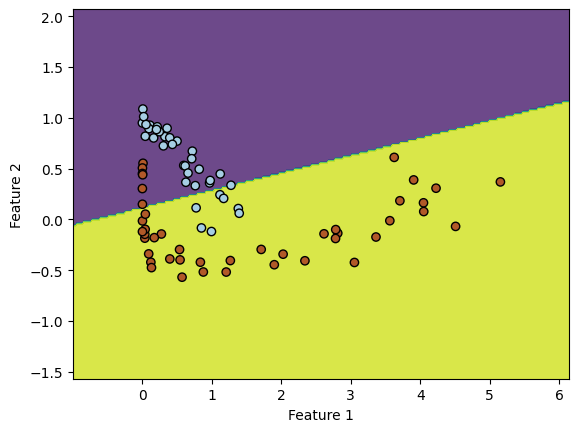

Example 2, Classifier: Quadratic Discriminant Analysis
Training Accuracy: 0.95
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.93      0.98      0.96        44

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



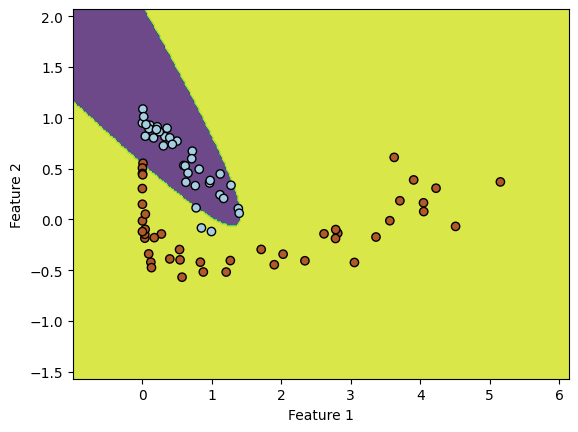

Example 2, Classifier: SVM with RBF Kernel
Training Accuracy: 0.95
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.95      0.95      0.95        44

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



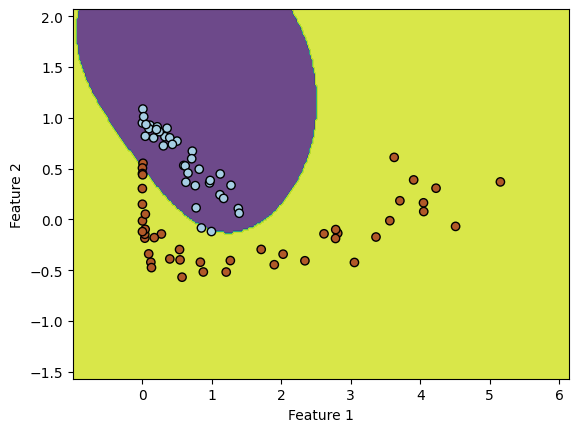

Example 2, Classifier: Decision Tree
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



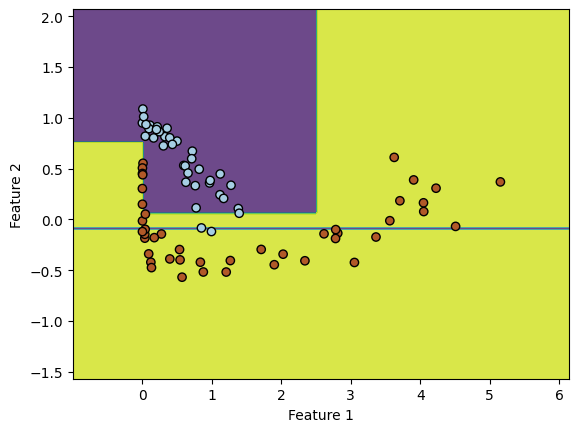

Example 2, Classifier: KNN with K=1
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



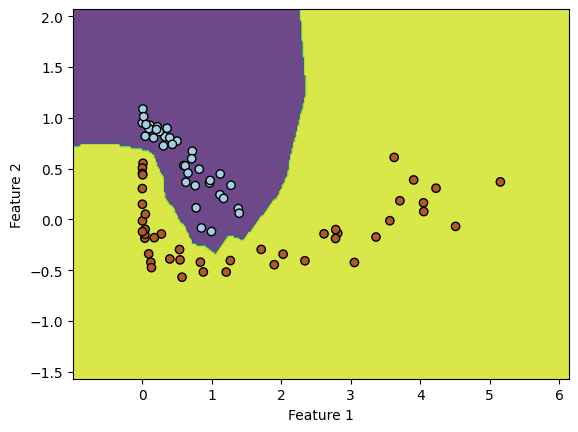

Example 3, Classifier: Naive Bayes
Training Accuracy: 0.6875
Testing Accuracy: 0.7
Training Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69        39
           1       0.71      0.66      0.68        41

    accuracy                           0.69        80
   macro avg       0.69      0.69      0.69        80
weighted avg       0.69      0.69      0.69        80

Test Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.71      0.56      0.63         9

    accuracy                           0.70        20
   macro avg       0.70      0.69      0.69        20
weighted avg       0.70      0.70      0.69        20



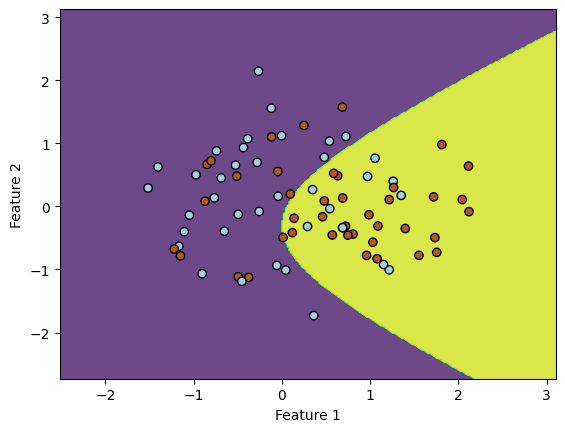

Example 3, Classifier: Logistic Regression
Training Accuracy: 0.6125
Testing Accuracy: 0.8
Training Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.59        39
           1       0.61      0.66      0.64        41

    accuracy                           0.61        80
   macro avg       0.61      0.61      0.61        80
weighted avg       0.61      0.61      0.61        80

Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



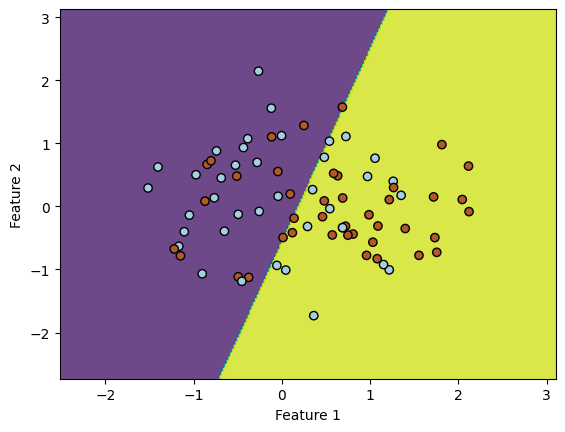

Example 3, Classifier: Quadratic Discriminant Analysis
Training Accuracy: 0.7
Testing Accuracy: 0.7
Training Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        39
           1       0.72      0.68      0.70        41

    accuracy                           0.70        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.70      0.70      0.70        80

Test Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.71      0.56      0.63         9

    accuracy                           0.70        20
   macro avg       0.70      0.69      0.69        20
weighted avg       0.70      0.70      0.69        20



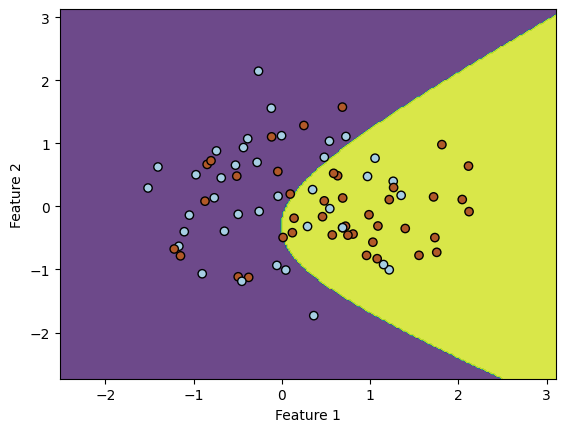

Example 3, Classifier: SVM with RBF Kernel
Training Accuracy: 0.675
Testing Accuracy: 0.65
Training Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.74      0.69        39
           1       0.71      0.61      0.66        41

    accuracy                           0.68        80
   macro avg       0.68      0.68      0.67        80
weighted avg       0.68      0.68      0.67        80

Test Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.67      0.44      0.53         9

    accuracy                           0.65        20
   macro avg       0.65      0.63      0.63        20
weighted avg       0.65      0.65      0.64        20



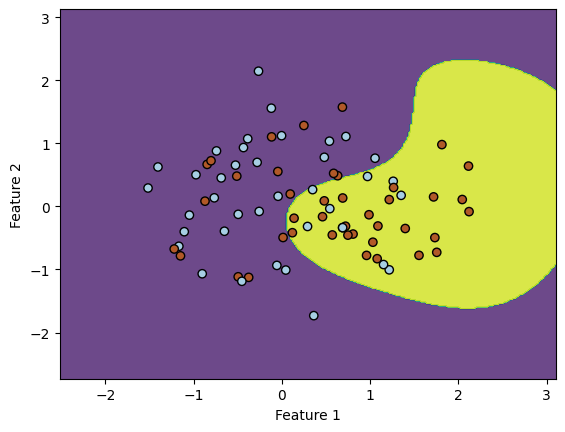

Example 3, Classifier: Decision Tree
Training Accuracy: 1.0
Testing Accuracy: 0.45
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        41

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.38      0.33      0.35         9

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.44      0.45      0.45        20



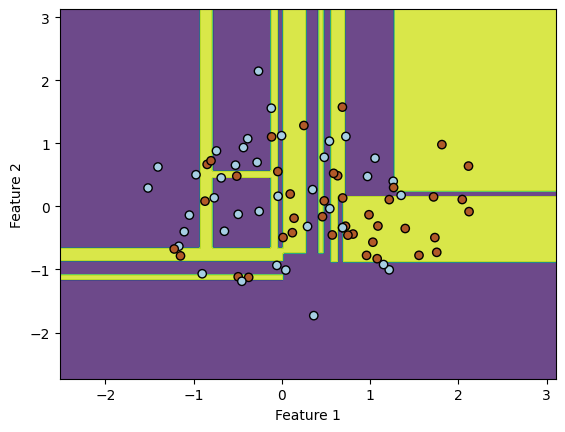

Example 3, Classifier: KNN with K=1
Training Accuracy: 1.0
Testing Accuracy: 0.6
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        41

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



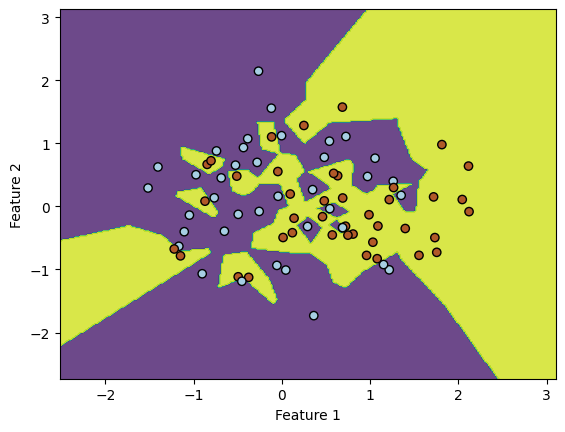

Example 4, Classifier: Naive Bayes
Training Accuracy: 0.95
Testing Accuracy: 0.95
Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        36
           1       1.00      0.91      0.95        44

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.96      0.95      0.95        80

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



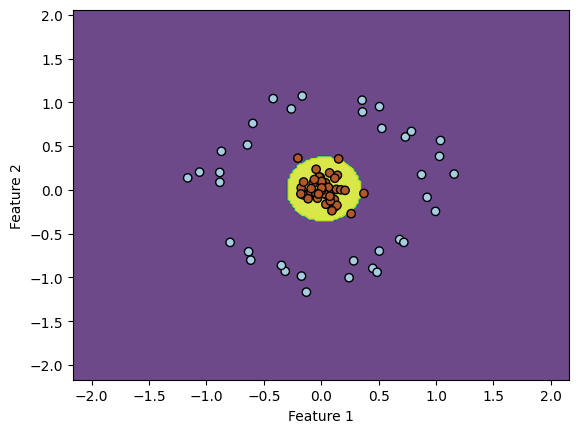

Example 4, Classifier: Logistic Regression
Training Accuracy: 0.55
Testing Accuracy: 0.35
Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.55      1.00      0.71        44

    accuracy                           0.55        80
   macro avg       0.28      0.50      0.35        80
weighted avg       0.30      0.55      0.39        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.32      1.00      0.48         6

    accuracy                           0.35        20
   macro avg       0.66      0.54      0.31        20
weighted avg       0.79      0.35      0.24        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


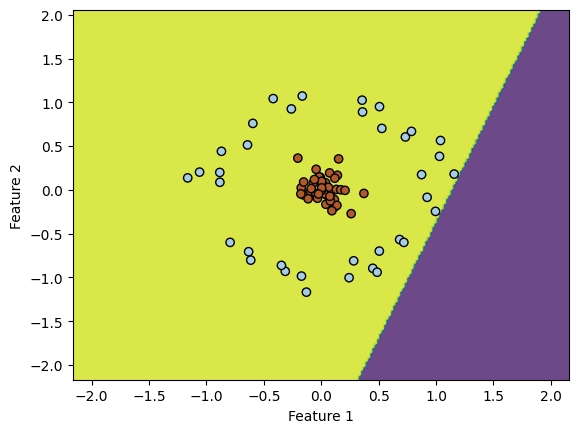

Example 4, Classifier: Quadratic Discriminant Analysis
Training Accuracy: 0.9625
Testing Accuracy: 0.95
Training Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      0.93      0.96        44

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



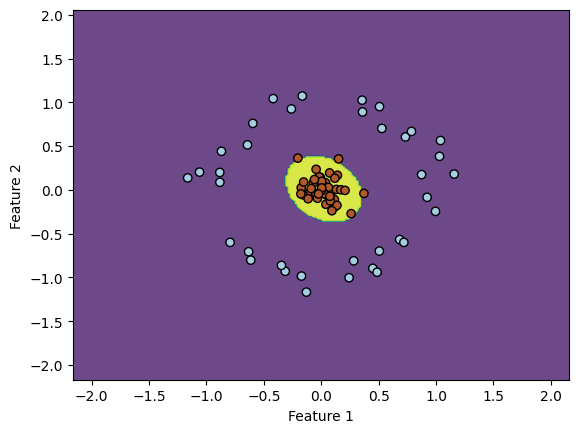

Example 4, Classifier: SVM with RBF Kernel
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



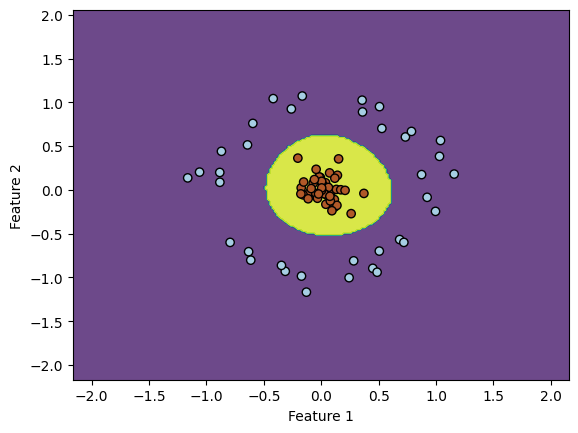

Example 4, Classifier: Decision Tree
Training Accuracy: 1.0
Testing Accuracy: 0.95
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



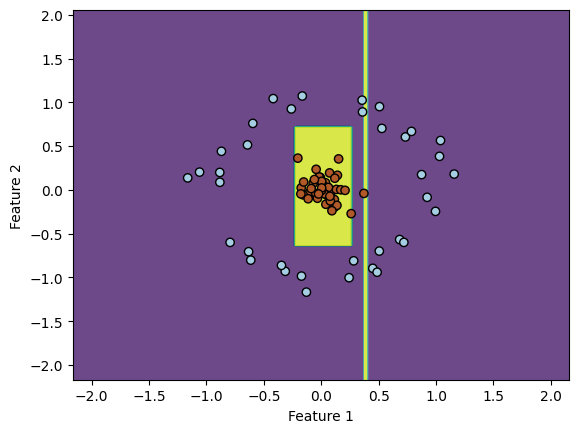

Example 4, Classifier: KNN with K=1
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



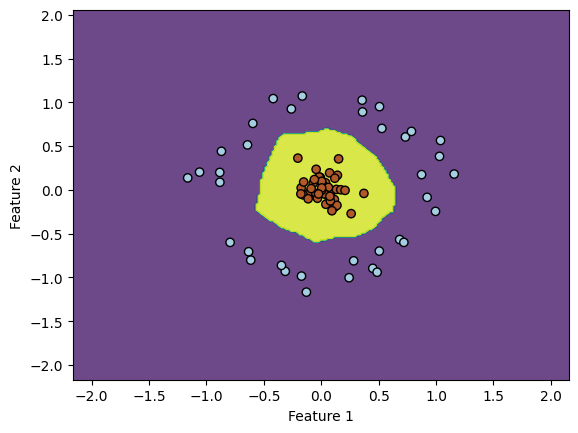

In [34]:
for example in range(1, 5):
    # Generating the data
    X, y = generate_synthetic_data(example)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Defining Classifiers
    classifiers = {
        'Naive Bayes': GaussianNB(),
        'Logistic Regression': LogisticRegression(),
        'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
        'SVM with RBF Kernel': SVC(kernel='rbf'),
        'Decision Tree': DecisionTreeClassifier(),
        'KNN with K=1': KNeighborsClassifier(n_neighbors=1)
    }

    # Loop through the classifiers, fit the models and then evaluating the results.
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)

        train_accuracy = accuracy_score(y_train, train_pred)
        test_accuracy = accuracy_score(y_test, test_pred)

        print(f"Example {example}, Classifier: {name}")
        print("Training Accuracy:", train_accuracy)
        print("Testing Accuracy:", test_accuracy)
        print("Training Classification Report:")
        print(classification_report(y_train, train_pred))
        print("Test Classification Report:")
        print(classification_report(y_test, test_pred))
        plot_decision_boundary(clf, X_train, y_train)



**OBSERVATIONS**

Example 1:
Since the 2 classes are very well separated, all the classifiers have perfect scores. The decision boundaries separate the two classes efficiently.

Example 2:
As we introduced Quadratic features, we can see the QDA does really well to capture those features with a perfect testing accuracy. Logistic Regression performs the worst and is unable to capture the quadratic features with a linear decision boundary. Naive Bayes has a little better performance than Logistic regression. SVM performs as good as QDA while Decision tree and KNN performs perfectly on both training as well as testing with complex decision boundaries.

Example 3:
As the data points follow an extremely complex pattern with significant amount of noise; Naive Bayes, Logistic Regression, QDA and SVM struggle to classify these points leading to poor training and testing accuracies. Decision Tree and KNN show overfitting. The complex decision boundaries are able to fit perfectly to the training data but performs very poorly on testing data. Decision tree does worse than the baseline whereas KNN is just slightly better than the baseline.

Example 4:
Since our data points follow a circular pattern, Logistic Regression performs extremely poor (much worse than the baseline on testing set) with its linear decision boundary. SVM and KNN have perfect training and testing scores while Decision tree, Naive Bayes and QDA do not acheive perfect scores but perform really well.
